# Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, to cater to the people's needs and stand out from other service providers and make huge profits.

Essentially, the company wants —


- Which variables are significant in predicting the demand for shared bikes?

- How well those variables describe the bike demands?


#### -------------------------------------------------------------------------------------------------------------

## Step 1: Reading and Understanding the Data

In [539]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore') 

In [540]:
# importing the dataset for bike demand
bike_dmd_df = pd.read_csv('day.csv')

# Looking at the first five rows
bike_dmd_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data cleaning

=========================================
Dataset characteristics
=========================================	

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [541]:
# Deleting column 'instant' and 'dteday' - they are unnessary and irrelevant to the analysis
bike_dmd_df = bike_dmd_df.drop(columns=['instant','dteday'], axis=1)

# Deleting column 'casual' and 'registered' - they are neither a dependent variable nor an independent variable
bike_dmd_df = bike_dmd_df.drop(columns=['casual','registered'], axis=1)

bike_dmd_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [542]:
# Converting "season" values into string categories
bike_dmd_df['season'] = bike_dmd_df[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

# Converting "mnth" values into string categories
bike_dmd_df['mnth'] = bike_dmd_df[['mnth']].apply(lambda x: x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may',6:'jun',7:'jul',
                                                                   8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}))

# Converting "weekday" values into string categories
bike_dmd_df['weekday'] = bike_dmd_df[['weekday']].apply(lambda x: x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 
                                                                         6: 'Mon', 0: 'Tues'}))

# Converting "weathersit" values into string categories
### 1 = CFPP - Clear, Few clouds, Partly cloudy, Partly cloudy
### 2 = MMMM - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
### 3 = LLLS - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
### 4 = HISF - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike_dmd_df['weathersit'] = bike_dmd_df[['weathersit']].apply(lambda x: x.map({1: 'CFPP', 2:'MMMM', 3:'LLLS', 4:'HISF'}))

In [543]:
bike_dmd_df['weathersit'].value_counts()

weathersit
CFPP    463
MMMM    246
LLLS     21
Name: count, dtype: int64

In [544]:
# checking datatypes of columns and missing values
bike_dmd_df.info()

#### Conclusion - datatypes and numbers look fine

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [545]:
# checking column basic statistics
bike_dmd_df.describe()

#### Conclusion - All the values look in range

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [546]:
# Standardising precision for better presentation of data or Solving over-precision

cols_over_precision = ['temp', 'atemp', 'hum', 'windspeed']

# rounding to 2 decimals
bike_dmd_df[['temp', 'atemp', 'hum', 'windspeed']] = bike_dmd_df[['temp', 'atemp', 'hum', 'windspeed']].round(decimals = 2)

bike_dmd_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Mon,0,MMMM,14.11,18.18,80.58,10.75,985
1,spring,0,jan,0,Tues,0,MMMM,14.90,17.69,69.61,16.65,801
2,spring,0,jan,0,Wed,1,CFPP,8.05,9.47,43.73,16.64,1349
3,spring,0,jan,0,Thurs,1,CFPP,8.20,10.61,59.04,10.74,1562
4,spring,0,jan,0,Fri,1,CFPP,9.31,11.46,43.70,12.52,1600


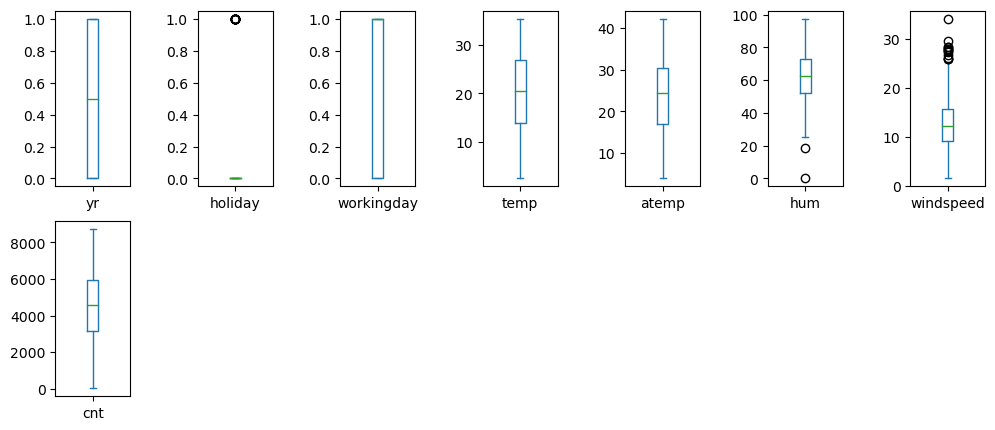

In [547]:
# Checking for Outliers for Numeric columns only

bike_dmd_df.plot( kind='box', subplots=True, sharey=False, figsize=(12, 5), layout=(2,7))

# increase spacing between subplots
plt.subplots_adjust(wspace=0.9) 
plt.show()

#### Conclusion - No serious outliers are detected

In [548]:
# Checking for duplicate values
bike_dmd_df[bike_dmd_df.duplicated()].shape

#### Conclusion - No duplicates found - Rows = 0

(0, 12)

In [549]:
bike_dmd_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Mon,0,MMMM,14.11,18.18,80.58,10.75,985
1,spring,0,jan,0,Tues,0,MMMM,14.90,17.69,69.61,16.65,801
2,spring,0,jan,0,Wed,1,CFPP,8.05,9.47,43.73,16.64,1349
3,spring,0,jan,0,Thurs,1,CFPP,8.20,10.61,59.04,10.74,1562
4,spring,0,jan,0,Fri,1,CFPP,9.31,11.46,43.70,12.52,1600


#### -----------------------------------------------------------------------------------------------------------------------------

## Step 2: Visualising the Data

### understanding the data

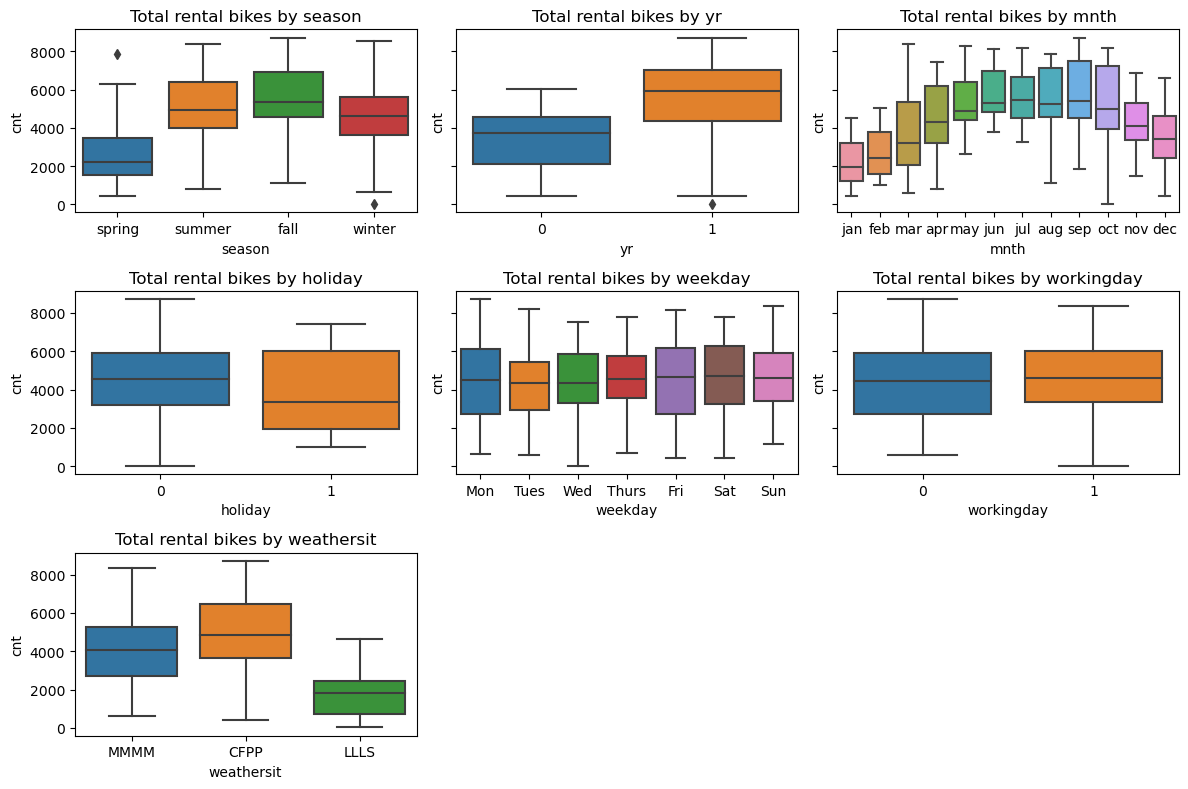

In [550]:
##### Combined Analysis by all the categorical columns #####

# Categorical columns
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Numerical column
numeric_col = 'cnt'

# Creating subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 8), sharey=True)

# Flattening axes to make indexing easier
axes = axes.flatten()

# Creating a boxplot for each categorical column
for i, cat_col in enumerate(categorical_cols):
    sns.boxplot(bike_dmd_df, x=cat_col, y=numeric_col, ax=axes[i])
    axes[i].set_title(f'Total rental bikes by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel(numeric_col)

    
# Remove any unused subplots if the number of plots is less than 9
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
# Adjust layout
plt.tight_layout()
plt.show()



#### ***********Insights*************************************

- Total rental bikes seem to be increasing in Summer and Fall (may be due to pleasant weather during these seasons in US)
- Total rental bikes are on the rise from 2018 to 2019
- Total rental bikes generally increases from January till around September and then declines till December
- Total rental bikes has a lower median during holidays. Some holidays people use the bike sharing more and in some holidays quite less (might be people are using it to commute during workdays more)
- No specific pattern by weekdays
- Slightly higher median on a working day (but nothing significant)
- The bike rentals are higher when the weather is - "Clear, Few clouds, Partly cloudy, Partly cloudy" and lowest when "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
- As the precipitation increases, the bike rentals decreases

#### ***********Insights*************************************

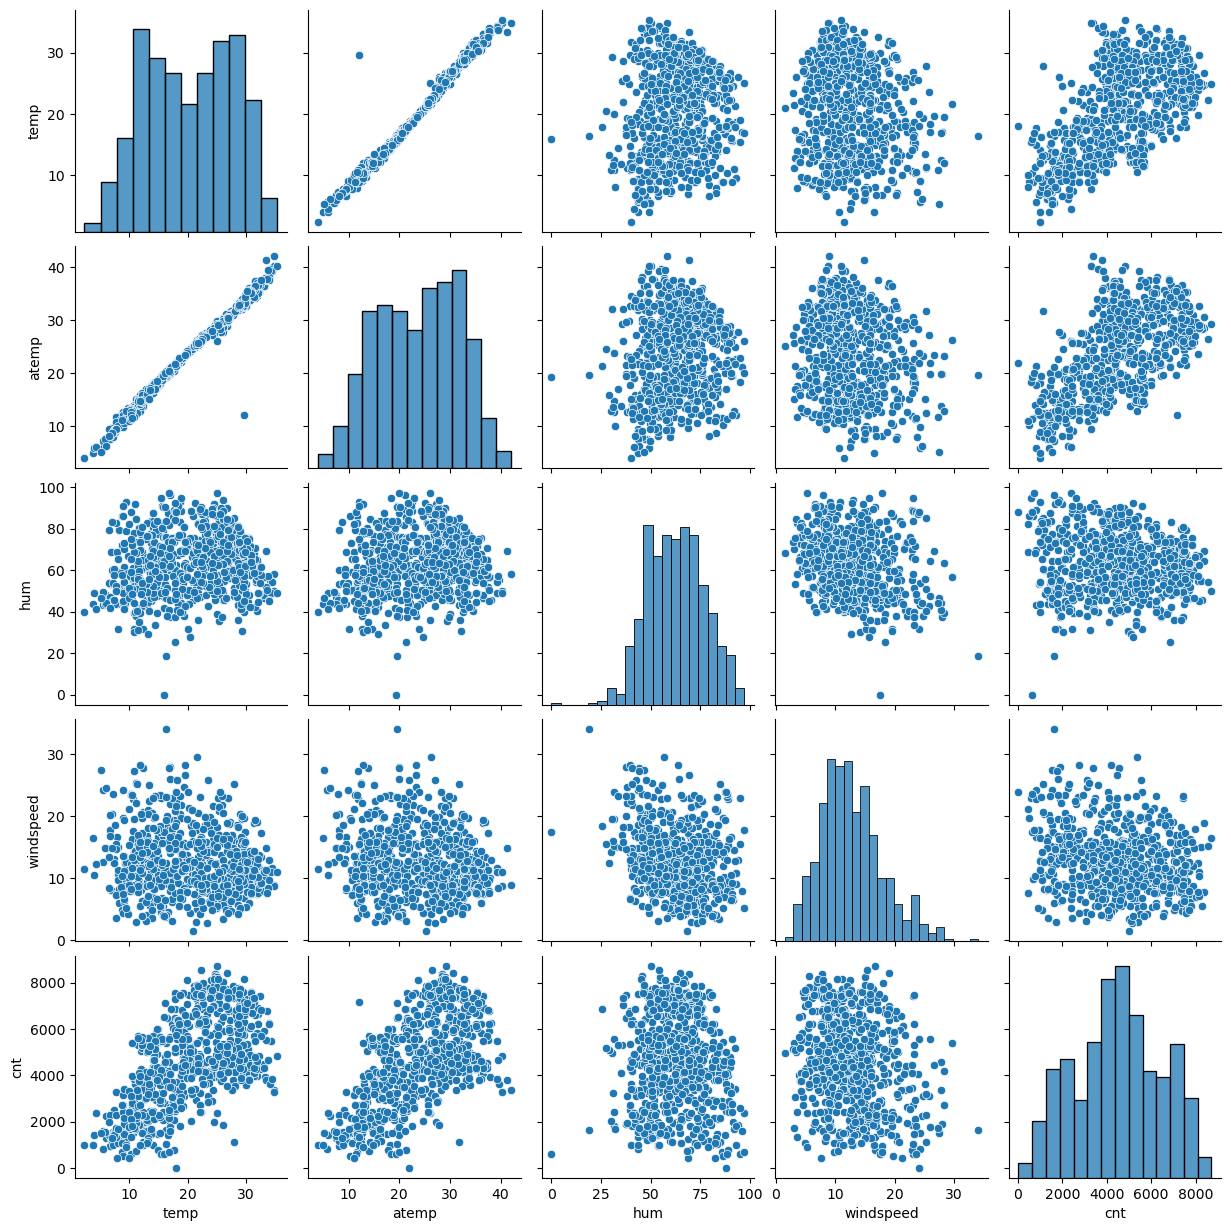

In [551]:
#### Checking linear relationship between the Numerical Variables (both Independent and Dependent) ####

# selecting only the numerical variables for analysis
Numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_dmd_df_scatter = bike_dmd_df[Numeric_cols]

# Ploting all scatter plots for Numerical variables using pairplot
sns.pairplot(bike_dmd_df_scatter)

# Show the plot
plt.show()


#### ***********Insights*************************************

- Temperature and Feeling temperature show a highly positive corelation with the Total rental bikes
- Humidity and Wind speed do not show any significant linear relationship with Total rental bikes
- Temperature and Feeling temperature are highly corelated to one-another. One of them is reduntant

#### ***********Insights*************************************

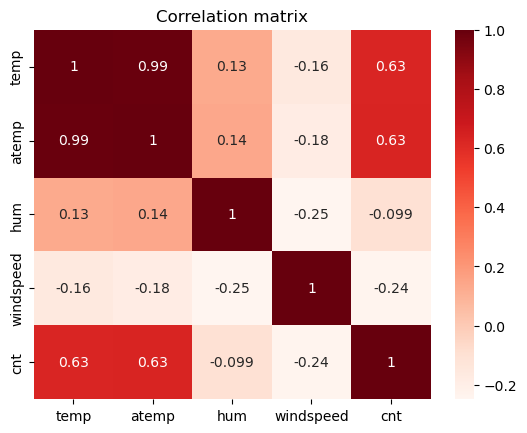

In [552]:
#### Checking correlation matrix - Confirming findings on collinearity from the above scatter plot

sns.heatmap(bike_dmd_df_scatter.corr(),cmap='Reds',annot=True)

# Add title and labels
plt.title('Correlation matrix')
plt.show()


#### ***********Insights*************************************

- Temperature and Feeling temperature show a highly positive corelation with the Total rental bikes
- Humidity and Wind speed do not show any significant linear relationship with Total rental bikes
- Temperature and Feeling temperature are highly corelated to one-another. One of them is reduntant

#### ***********Insights*************************************

##### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 3: Data Preparation

### Handling highly corelated variables
##### (creating a derived feature using temp and atemp)

In [553]:
# Creating a derived feature by taking Average of Temperature(temp) and Feeling temperature(atemp) (Highly corelated variables)
bike_dmd_df['derived_temp'] = (bike_dmd_df['temp'] + bike_dmd_df['atemp'])/2

# Since a derived feature is creating, dropping temp and atemp
bike_dmd_df = bike_dmd_df.drop(columns=['temp','atemp'], axis=1)


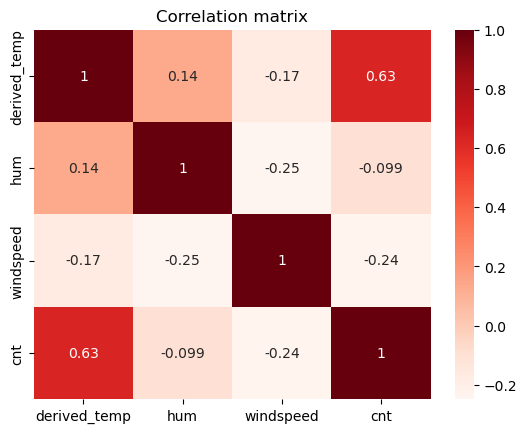

In [554]:
#### Checking correlation matrix again

sns.heatmap(bike_dmd_df[['derived_temp','hum','windspeed','cnt']].corr(),cmap='Reds',annot=True)

# Add title and labels
plt.title('Correlation matrix')
plt.show()


#### The high corelation between temp and atemp is resolved

In [555]:
bike_dmd_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,hum,windspeed,cnt,derived_temp
0,spring,0,jan,0,Mon,0,MMMM,80.58,10.75,985,16.145
1,spring,0,jan,0,Tues,0,MMMM,69.61,16.65,801,16.295
2,spring,0,jan,0,Wed,1,CFPP,43.73,16.64,1349,8.760
3,spring,0,jan,0,Thurs,1,CFPP,59.04,10.74,1562,9.405
4,spring,0,jan,0,Fri,1,CFPP,43.70,12.52,1600,10.385


### Dummy variables
##### (Need to convert the categorical variables into numeric (0 and 1) to feed into the Linear regression)

In [556]:
# yr, holiday, workingday are already represented in binary (0 and 1)

# Get the dummy variables for the categorical columns - Season, Month, Weekday, Weather
category_list = ['season', 'mnth', 'weekday', 'weathersit']

dummy_df = pd.get_dummies(bike_dmd_df[category_list], drop_first = True).astype(int)

# Add the results to the original housing dataframe
bike_dmd_df = pd.concat([bike_dmd_df, dummy_df], axis = 1)

# Now let's see the head of our dataframe.
bike_dmd_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,hum,windspeed,cnt,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_LLLS,weathersit_MMMM
0,spring,0,jan,0,Mon,0,MMMM,80.58,10.75,985,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,Tues,0,MMMM,69.61,16.65,801,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,Wed,1,CFPP,43.73,16.64,1349,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,Thurs,1,CFPP,59.04,10.74,1562,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,Fri,1,CFPP,43.70,12.52,1600,...,0,0,0,0,0,0,0,0,0,0


In [557]:
# since we have created dummy variables, dropping 'season', 'mnth', 'weekday', 'weathersit'
bike_dmd_df = bike_dmd_df.drop(columns = category_list, axis=1)

In [558]:
bike_dmd_df.columns

Index(['yr', 'holiday', 'workingday', 'hum', 'windspeed', 'cnt',
       'derived_temp', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'weathersit_LLLS', 'weathersit_MMMM'],
      dtype='object')

#### -----------------------------------------------------------------------------------------------------------------------------------------------

## Step 4: Splitting the Data into Training and Testing Sets

In [559]:
from sklearn.model_selection import train_test_split

# dividing the data into train(75%) and test(25%)

df_train, df_test = train_test_split(bike_dmd_df, train_size = 0.75, test_size = 0.25, random_state = 100)

In [560]:
# checking train and test dimensions

print(df_train.shape)
print(df_test.shape)

(547, 29)
(183, 29)


### Rescaling the Features 

We will use MinMax scaling.

In [561]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMax scaler
scaler = MinMaxScaler()

#### Scaling the train data

In [562]:
# Apply scaler() to all the Independent numerical columns except the binary and 'dummy' variables
num_vars = ['hum', 'windspeed', 'derived_temp']

df_train_scaled = df_train.copy()

df_train_scaled[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train_scaled.head()

,yr,holiday,workingday,hum,windspeed,cnt,derived_temp,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_LLLS,weathersit_MMMM
311,0,0,1,0.743714,0.057748,4205,0.439744,0,0,1,...,0,0,0,0,0,1,0,0,0,0
523,1,0,1,0.482172,0.286173,7736,0.711710,0,1,0,...,0,0,0,0,1,0,0,0,0,0
381,1,0,1,0.737943,0.659609,2935,0.385096,1,0,0,...,0,0,0,0,0,1,0,0,0,1
413,1,0,0,0.550907,0.319538,4318,0.363520,1,0,0,...,0,0,1,0,0,0,0,0,0,0
253,0,0,0,0.735573,0.156561,5046,0.722214,0,0,0,...,0,1,0,0,0,0,1,0,0,0


#### Scaling the test data

In [563]:
# Transform the test data using the same scaler
df_test_scaled = df_test.copy()

df_test_scaled[num_vars] = scaler.transform(df_test[num_vars])

df_test_scaled.head()

,yr,holiday,workingday,hum,windspeed,cnt,derived_temp,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_LLLS,weathersit_MMMM
184,0,1,0,0.657358,0.084376,6043,0.804684,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.610161,0.153994,6211,0.876650,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.837696,0.334296,2659,0.507452,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.437139,0.339750,4780,0.841874,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.314303,0.537376,4968,0.782825,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### Dividing into X and Y sets for the model building

In [564]:
y_train = df_train_scaled.pop('cnt')
X_train = df_train_scaled

#### -----------------------------------------------------------------------------------------------------------------------------------

## Step 5: Building a linear model

Using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
#### Recursive feature elimination - Running RFE with the output number of the variable equal to 15 from 29

In [565]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [566]:
# Initialize a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Initialize RFE with the linear regression model and choose the number of features to select
rfe = RFE(estimator=lr_model, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [567]:
# check the selected variables and their importance(ranking)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('derived_temp', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 4),
 ('mnth_jan', False, 3),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 8),
 ('mnth_mar', False, 13),
 ('mnth_may', False, 6),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 14),
 ('weekday_Sun', False, 11),
 ('weekday_Thurs', False, 10),
 ('weekday_Tues', True, 1),
 ('weekday_Wed', False, 9),
 ('weathersit_LLLS', True, 1),
 ('weathersit_MMMM', True, 1)]

In [568]:
# columns selected by RFE
selected_cols = X_train.columns[rfe.support_]
selected_cols

Index(['yr', 'holiday', 'workingday', 'hum', 'windspeed', 'derived_temp',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_nov', 'mnth_sep',
       'weekday_Mon', 'weekday_Tues', 'weathersit_LLLS', 'weathersit_MMMM'],
      dtype='object')

In [569]:
# columns NOT selected by RFE
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thurs', 'weekday_Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

#### Build model using the columns selected by RFE and Manually select the best column list using p-value and VIF

In [570]:
# Creating X_train dataframe with RFE selected variables
X_train_selected = X_train[selected_cols]
X_train_selected.shape

(547, 15)

In [571]:
# importing statsmodel
import statsmodels.api as sm  

# Adding a constant variable to predict coeff. for intercept 
X_train_selected = sm.add_constant(X_train_selected)

In [572]:
X_train_selected.head()

,const,yr,holiday,workingday,hum,windspeed,derived_temp,season_spring,season_winter,mnth_jul,mnth_nov,mnth_sep,weekday_Mon,weekday_Tues,weathersit_LLLS,weathersit_MMMM
311,1.0,0,0,1,0.743714,0.057748,0.439744,0,1,0,1,0,0,0,0,0
523,1.0,1,0,1,0.482172,0.286173,0.711710,0,0,0,0,0,0,0,0,0
381,1.0,1,0,1,0.737943,0.659609,0.385096,1,0,0,0,0,0,0,0,1
413,1.0,1,0,0,0.550907,0.319538,0.363520,1,0,0,0,0,1,0,0,0
253,1.0,0,0,0,0.735573,0.156561,0.722214,0,0,0,0,1,0,1,0,0


### Creating 1st Model using all the selected features from RFE

### Model 1

In [573]:
# creating a linear model and training it
sm_model = sm.OLS(y_train,X_train_selected)

# Running the linear model
sm_model = sm_model.fit()  

In [574]:
# Checking Summary of our linear model
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.7
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.86e-206
Time:                        16:40:38   Log-Likelihood:                -4407.3
No. Observations:                 547   AIC:                             8845.
Df Residuals:                     532   BIC:                             8909.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2140.5157    212.906     

### Since "holiday" is insignificant with a p-value = 0.463 > 0.05; dropping it and Updating the model

### Model 2

In [575]:
X_train_selected_1 = X_train_selected.drop(columns='holiday', axis=1)
X_train_selected_1.shape

(547, 15)

In [576]:
# builing new model after removing holiday
sm_model_1 = sm.OLS(y_train,X_train_selected_1)

# running the model
sm_model_1 = sm_model_1.fit()

In [577]:
# Checking Summary of our linear model
print(sm_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.7
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.86e-206
Time:                        16:40:38   Log-Likelihood:                -4407.3
No. Observations:                 547   AIC:                             8845.
Df Residuals:                     532   BIC:                             8909.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2013.1297    332.072     

#### Both R-squared and Adj. R-squared values did not change. So "holiday" is insignificant and removing it is valid

### Since "mnth_nov" is insignificant with a p-value = 0.057 > 0.05; dropping it and Updating the model

### Model 3

In [578]:
X_train_selected_2 = X_train_selected_1.drop(columns='mnth_nov', axis=1)
X_train_selected_2.shape

(547, 14)

In [579]:
# builing new model after removing mnth_nov
sm_model_2 = sm.OLS(y_train,X_train_selected_2)

# running the model
sm_model_2 = sm_model_2.fit()

In [580]:
# Checking Summary of our linear model
print(sm_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     225.5
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          7.45e-207
Time:                        16:40:39   Log-Likelihood:                -4409.2
No. Observations:                 547   AIC:                             8846.
Df Residuals:                     533   BIC:                             8907.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1914.1054    328.820     

#### After removing "mnth_nov", both R-Squared and Adj. R-squared values did not change much (changed by negligible 0.001); which is insignificant. 

#### So finally removing "mnth_nov" to simplify the model

#### Now all the Predictors look significant with p_values less < 0.05

### VIF : Checking for Multi-collinearity

In [581]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# dropping constant before VIF analysis
X_train_selected_2 = X_train_selected_2.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_selected_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,29.63
4,derived_temp,17.44
1,workingday,16.29
10,weekday_Tues,4.48
3,windspeed,4.44
9,weekday_Mon,4.39
5,season_spring,2.89
12,weathersit_MMMM,2.30
6,season_winter,2.10
0,yr,2.07


### Since 'hum' is having a very high VIF > 5, removing it and updating the model

### Model 4

In [582]:
X_train_selected_3 = X_train_selected_2.drop(columns='hum', axis=1)

# Adding a constant variable to predict coeff. for intercept 
X_train_selected_3 = sm.add_constant(X_train_selected_3)

X_train_selected_3.shape

(547, 13)

In [583]:
# builing new model after removing mnth_jan
sm_model_3 = sm.OLS(y_train,X_train_selected_3)

# running the model
sm_model_3 = sm_model_3.fit()

In [584]:
# Checking Summary of our linear model
print(sm_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     234.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          4.66e-204
Time:                        16:40:39   Log-Likelihood:                -4418.6
No. Observations:                 547   AIC:                             8863.
Df Residuals:                     534   BIC:                             8919.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1174.6425    285.702     

In [585]:
### calculate VIFs again for the new model

# dropping constant before VIF analysis
X_train_selected_3 = X_train_selected_3.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_selected_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,12.83
3,derived_temp,12.35
2,windspeed,4.41
8,weekday_Mon,3.66
9,weekday_Tues,3.60
4,season_spring,2.48
0,yr,2.06
5,season_winter,1.74
11,weathersit_MMMM,1.58
6,mnth_jul,1.34


### Since 'workingday' is having a very high VIF > 5, removing it and updating the model

### Model 5

In [586]:
X_train_selected_4 = X_train_selected_3.drop(columns='workingday', axis=1)

# Adding a constant variable to predict coeff. for intercept 
X_train_selected_4 = sm.add_constant(X_train_selected_4)

X_train_selected_4.shape

(547, 12)

In [587]:
# builing new model after removing workingday
sm_model_4 = sm.OLS(y_train,X_train_selected_4)

# running the model
sm_model_4 = sm_model_4.fit()

In [588]:
# Checking Summary of our linear model
print(sm_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          4.13e-200
Time:                        16:40:39   Log-Likelihood:                -4430.8
No. Observations:                 547   AIC:                             8886.
Df Residuals:                     535   BIC:                             8937.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2176.3184    205.376     

In [589]:
### calculate VIFs again for the new model

# dropping constant before VIF analysis
X_train_selected_4 = X_train_selected_4.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_selected_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,derived_temp,4.63
1,windspeed,3.99
0,yr,2.05
3,season_spring,1.69
10,weathersit_MMMM,1.54
4,season_winter,1.41
5,mnth_jul,1.33
7,weekday_Mon,1.22
8,weekday_Tues,1.21
6,mnth_sep,1.20


### Since 'weekday_Mon' is having a high p-value = 0.191 > 0.05, removing it and updating the model

### Model 6

In [590]:
X_train_selected_5 = X_train_selected_4.drop(columns='weekday_Mon', axis=1)

# Adding a constant variable to predict coeff. for intercept 
X_train_selected_5 = sm.add_constant(X_train_selected_5)

X_train_selected_5.shape

(547, 11)

In [591]:
# builing new model after removing weekday_Mon
sm_model_5 = sm.OLS(y_train,X_train_selected_5)

# running the model
sm_model_5 = sm_model_5.fit()

In [592]:
# Checking Summary of our linear model
print(sm_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     267.2
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          5.77e-201
Time:                        16:40:39   Log-Likelihood:                -4431.7
No. Observations:                 547   AIC:                             8885.
Df Residuals:                     536   BIC:                             8933.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2200.0112    204.713     

In [593]:
### calculate VIFs again for the new model

# dropping constant before VIF analysis
X_train_selected_5 = X_train_selected_5.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_selected_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,derived_temp,4.58
1,windspeed,3.96
0,yr,2.05
3,season_spring,1.68
9,weathersit_MMMM,1.54
4,season_winter,1.39
5,mnth_jul,1.33
6,mnth_sep,1.20
7,weekday_Tues,1.18
8,weathersit_LLLS,1.08


#### All the p-values for the predictors is < 0.05
#### VIF values are less than 5, thus multi-collinearity issue is resolved

### Selecting the Final model

In [594]:
# So selecting the 'X_train_selected_5' set of columns as final for modelling and prediction
X_train_final = X_train_selected_5

# Adding a constant variable to predict coeff. for intercept 
X_train_final = sm.add_constant(X_train_final)

# making sm_model_5 as the final model
sm_model_final = sm_model_5

#### -------------------------------------------------------------------------------------------------------------------------------------------------

## Step 6: Residual Analysis of the train data

### Now checking if the Linear regression assumptions are satisfied :
#### 1. Error terms are normally distributed and mean = 0
#### 2. Error terms are independent of each other
#### 3. Error terms follow the same variance for all the values of predictor X (Homoscedasticity)

In [595]:
# Predicting dependent variable for the final train data
y_train_pred = sm_model_final.predict(X_train_final)

Text(0.5, 0, 'Errors')

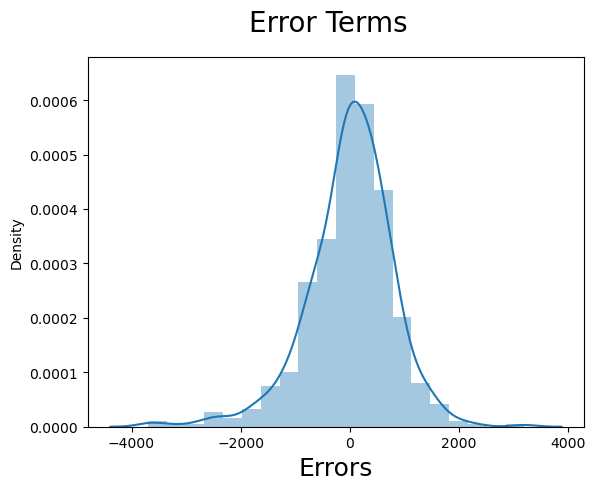

In [596]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)   


#### The first linear regression assumption is satisfied - error terms are normally dstributed and centered around 0.

Text(0, 0.5, 'error')

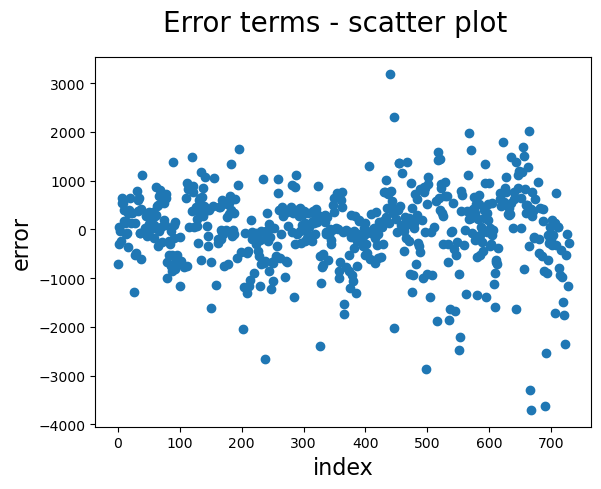

In [597]:
# Plotting Error_terms vs index for the train data to understand the spread

fig = plt.figure()
plt.scatter( X_train_final.index, y_train - y_train_pred)
fig.suptitle('Error terms - scatter plot', fontsize = 20)    # Plot heading 
plt.xlabel('index', fontsize = 16)                          # X-label
plt.ylabel('error', fontsize = 16)     

Text(0, 0.5, 'error')

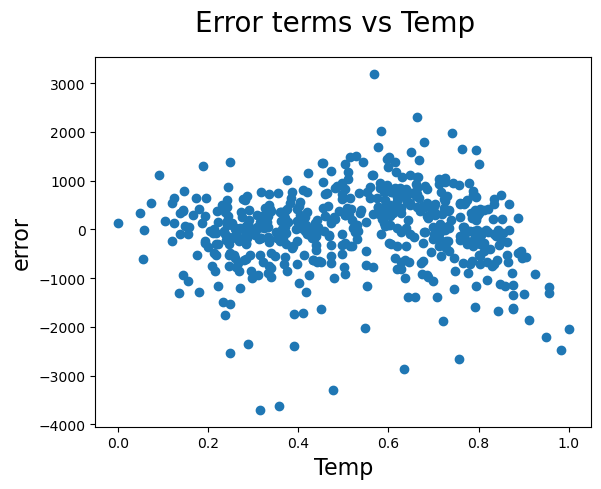

In [598]:
# Plotting Error_terms vs derived_temp for the train data to understand the spread

fig = plt.figure()
plt.scatter( X_train_final.derived_temp, y_train - y_train_pred)
fig.suptitle('Error terms vs Temp', fontsize = 20)    # Plot heading 
plt.xlabel('Temp', fontsize = 16)                          # X-label
plt.ylabel('error', fontsize = 16)  

#### There is no specific pattern noticed in the error terms. Thus, error terms are independent and follow constant variance (variance seems to vary slightly but not significant)

#### The error terms follow all the assumptions of linear regression

#### -------------------------------------------------------------------------------------------------------------------------------------

## Step 7: Making Predictions Using the Final Model

Since the model follows the assumptions of linear regression, we can make predictions on the test data

### Dividing into X and Y sets for scaled test data for prediction

In [599]:
y_test = df_test_scaled.pop('cnt')
X_test = df_test_scaled

In [600]:
# Adding a constant variable to predict coeff. for intercept 
X_test = sm.add_constant(X_test)

# Selecting only the Significant variables as predictors
X_test_final = X_test[X_train_final.columns]

In [601]:
# Predicting y_test using the FINAL model - sm_model_final
y_test_pred = sm_model_final.predict(X_test_final)

#### ---------------------------------------------------------------------------------------------------------------------------------------

## Step 8: Model Evaluation

In [602]:
# calculating R-squared value for the model for the test data
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
print("R-squared on test data:", round(r_squared,2))

R-squared on test data: 0.8


Text(0, 0.5, 'y_pred')

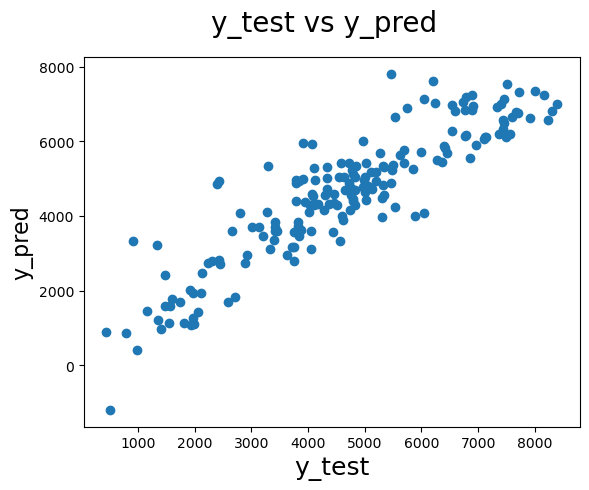

In [603]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

# We can see a good linear relation between y and y predictions

-----------------------------------------------------------------------------------------------------------------------------
# Conclusion

### The variables significant in predicting the demand for shared bikes are (10 variables) :
#### - year
#### - wind speed
#### - temperature
#### - is Season spring
#### - is Seasin winter
#### - is Month Jul
#### - is Month Sept
#### - is Weekday Tuesday
#### - is Weather : "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
#### - is Weather : "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
### Since the R-squared values for train data (0.833) and for test data (0.80) are very close : we do not see any Over-fitting 
### ******************************** 
### We can say the model is pretty good for prediction and explains above 80% variance in the Bike Demand 
### ********************************
-----------------------------------------------------------------------------------------------------------------------------

##### Note : Alpha (significance level) = 0.05